## Data Understanding
- Data Loading
  - Import Library
  - Loading Dataset
- EDA
  - Cek Tipe Data
  - Cek Isi Baris
  - Cek Deskripsi Statistik
  - Cek Missing Value
  - Cek Duplikasi Data
  - EDA Univariate Analysis
    - Cek Distribusi Fitur Numerikal
    - Cek Distribusi Fitur Kategorikal
  - Correlation Matrix
  

#MinatMatch.AI

### Data Loading

#### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf

#### Loading Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("davincisdata/careerdataset")

print("Path to dataset files:", path)

100%|██████████| 728k/728k [00:00<00:00, 43.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/davincisdata/careerdataset/versions/1


In [3]:
import pandas as pd
file_path = path + "/career_dataset.csv"
data = pd.read_csv(file_path)
sample_data = data.sample(n=13000, random_state=42)


### EDA

#### Cek Tipe Data

In [4]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13000 entries, 10650 to 2637
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Unnamed: 0                                13000 non-null  int64 
 1   Acedamic percentage in Operating Systems  13000 non-null  int64 
 2   percentage in Algorithms                  13000 non-null  int64 
 3   Percentage in Programming Concepts        13000 non-null  int64 
 4   Percentage in Software Engineering        13000 non-null  int64 
 5   Percentage in Computer Networks           13000 non-null  int64 
 6   Percentage in Electronics Subjects        13000 non-null  int64 
 7   Percentage in Computer Architecture       13000 non-null  int64 
 8   Percentage in Mathematics                 13000 non-null  int64 
 9   Percentage in Communication skills        13000 non-null  int64 
 10  Hours working per day                     13000 

#### Cek Isi Baris

In [5]:
sample_data.head()

,Unnamed: 0,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,...,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Suggested Job Role
10650,10650,78,71,82,89,69,73,92,89,72,...,no,Health,Work,yes,stubborn,Management,work,hard worker,no,Database Administrator
2041,2041,72,73,90,66,71,76,66,73,74,...,no,Guide,Work,no,stubborn,Management,work,smart worker,yes,Solutions Architect
8668,8668,73,77,74,88,89,78,93,90,79,...,no,Guide,Work,yes,stubborn,Management,work,smart worker,no,Software Engineer
1114,1114,77,67,73,69,86,90,67,89,90,...,yes,Journals,Work,no,gentle,Technical,work,hard worker,yes,Software Engineer
13902,13902,86,92,90,93,94,75,91,86,61,...,yes,Comics,Work,no,gentle,Management,work,hard worker,no,Systems Analyst


#### Cek Deskripsi Statistik

In [6]:
sample_data.describe(include="all")

,Unnamed: 0,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,...,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Suggested Job Role
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,...,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,31,2,2,2,2,2,2,2,9
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,yes,Horror,salary,yes,gentle,Technical,salary,smart worker,no,Software Engineer
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6515,767,6519,6549,6518,6556,6561,6512,6500,2613
mean,9988.419000,77.028846,76.949615,77.025308,77.060615,76.971923,77.050846,77.018308,76.936077,76.854769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5754.633761,10.093555,10.103229,10.127872,10.089614,10.069543,10.181548,10.086615,10.155722,10.135461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5002.500000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9975.500000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,14967.250000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cek Missing Value

In [7]:
missing_values = sample_data.isnull().sum()
missing_values[missing_values > 0]

,0


#### Cek Kelas Target

In [8]:
print(data['Suggested Job Role'].value_counts())
print(data['Suggested Job Role'].unique())

Suggested Job Role
Software Engineer               4001
Database Developer              3427
Systems Analyst                 2785
Network Security Engineer       2363
Solutions Architect             2247
Database Administrator          1751
Design & UX                     1177
E-Commerce Analyst              1148
Information Security Analyst    1101
Name: count, dtype: int64
['Database Developer' 'Database Administrator' 'Systems Analyst'
 'Software Engineer' 'Solutions Architect' 'Design & UX'
 'Information Security Analyst' 'E-Commerce Analyst'
 'Network Security Engineer']


#### Cek Duplikasi Data

In [9]:
duplicates = sample_data.duplicated()
print("Baris duplikat:")
print(sample_data[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [Unnamed: 0, Acedamic percentage in Operating Systems, percentage in Algorithms, Percentage in Programming Concepts, Percentage in Software Engineering, Percentage in Computer Networks, Percentage in Electronics Subjects, Percentage in Computer Architecture, Percentage in Mathematics, Percentage in Communication skills, Hours working per day, Logical quotient rating, hackathons, coding skills rating, public speaking points, can work long time before system?, self-learning capability?, Extra-courses did, certifications, workshops, talenttests taken?, olympiads, reading and writing skills, memory capability score, Interested subjects, Introvert, Job/Higher Studies?, Type of company want to settle in?, Taken inputs from seniors or elders, interested in games, Interested Type of Books, Salary Range Expected, In a Realtionship?, Gentle or Tuff behaviour?, Management or Technical, Salary/work, hard/smart worker, worked in teams ever?, Suggested Job Ro

#### EDA Univariate Analysis

In [10]:
career_counts = sample_data['Suggested Job Role'].value_counts()
print(career_counts)

Suggested Job Role
Software Engineer               2613
Database Developer              2277
Systems Analyst                 1774
Network Security Engineer       1529
Solutions Architect             1446
Database Administrator          1169
E-Commerce Analyst               772
Design & UX                      723
Information Security Analyst     697
Name: count, dtype: int64


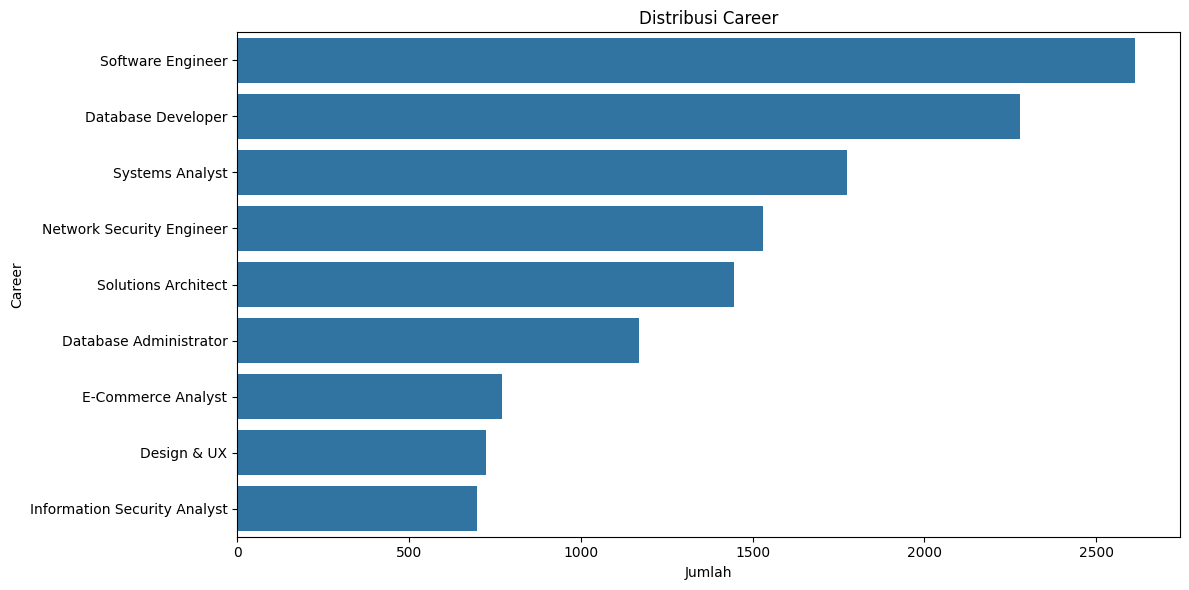

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=sample_data, y='Suggested Job Role', order=career_counts.index)
plt.title("Distribusi Career")
plt.xlabel("Jumlah")
plt.ylabel("Career")
plt.tight_layout()
plt.show()

##### Cek Distribusi Fitur Numerikal

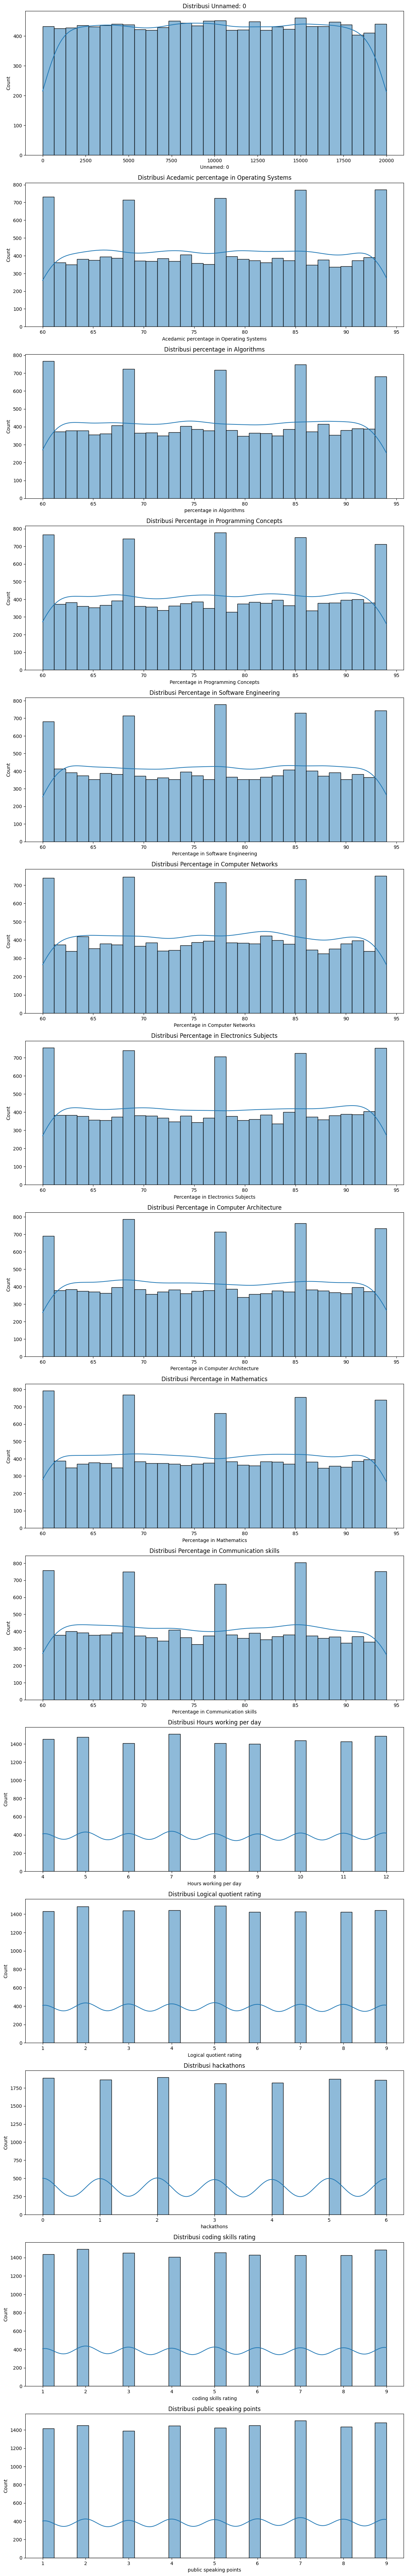

In [12]:
numeric_features = sample_data.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 100))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(20, 1, i)
    sns.histplot(sample_data[col], bins=30, kde=True)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

##### Cek Distribusi Fitur Kategorikal

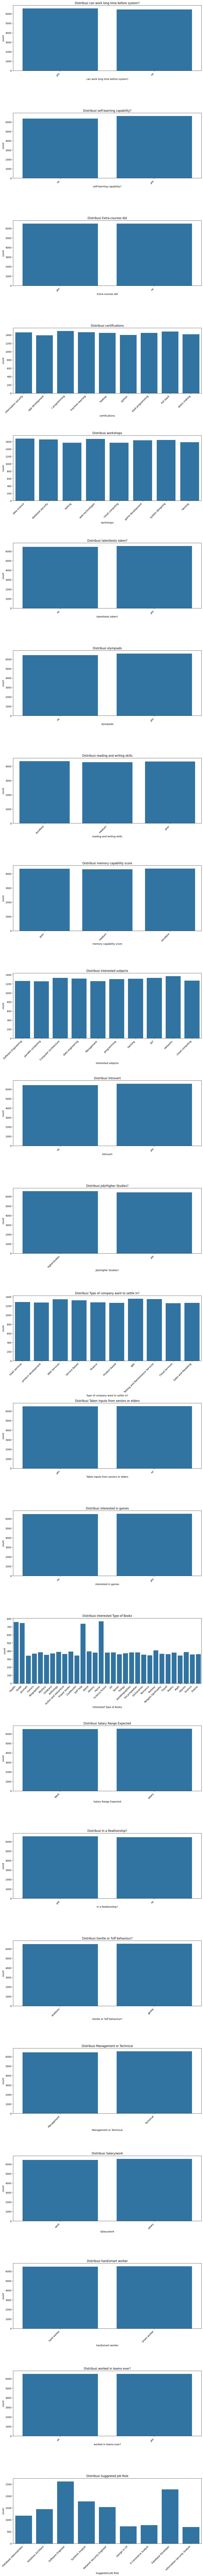

In [13]:
categorical_features = sample_data.select_dtypes(include=['object']).columns.tolist()
plt.figure(figsize=(12, 150))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(24, 1, i)
    sns.countplot(x=sample_data[col])
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Correlation Matrix

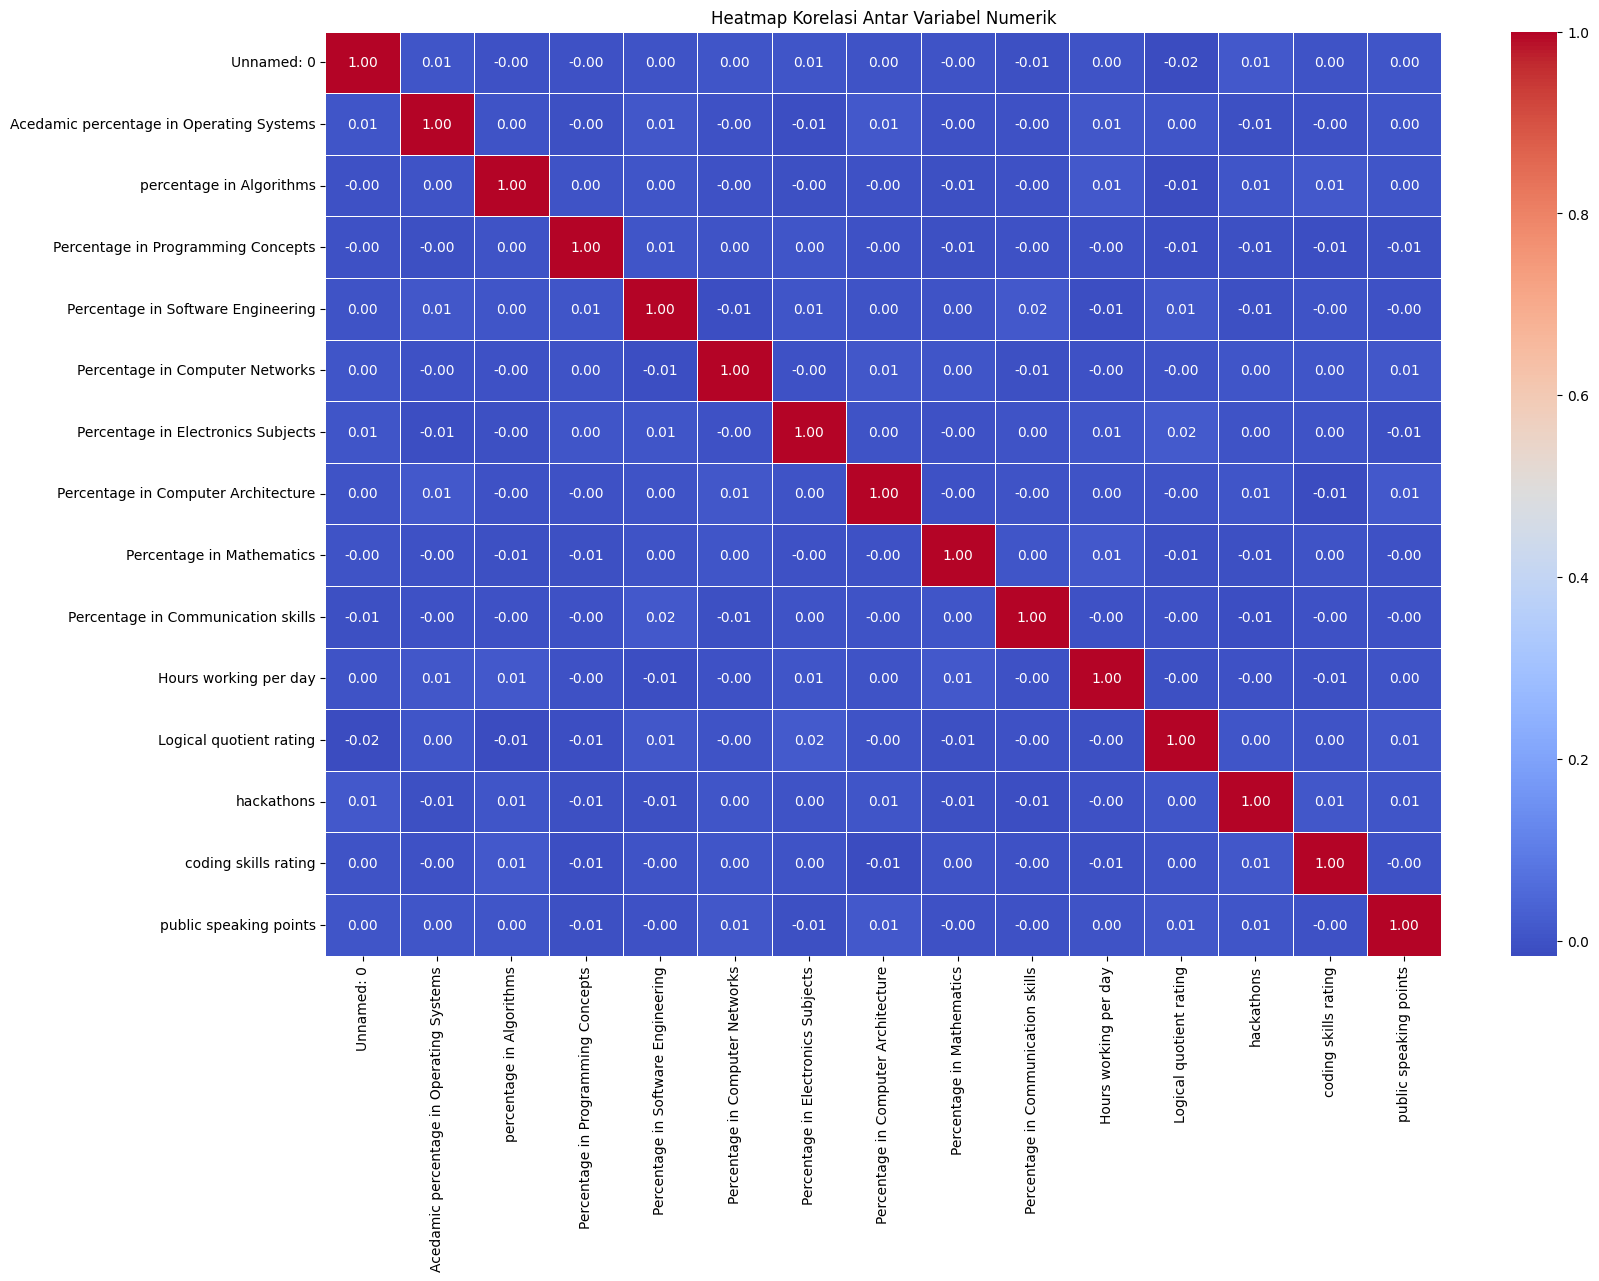

In [14]:
correlation = data[numeric_features].corr()
plt.figure(figsize=(18, 12))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

## Data Preparation

Teknik yang akan dilakukan:
* Fitur selection : menghapus beberapa fitur yang tidak relevan, seperti Interested Type of Books
  - Fitur: semua kolom kecuali kolom Suggested Job Role
  - Target: Suggested Job Role
* Outliers checking & handling : Mengurangi outliers
* Standarisasi : Menyamakan skala fitur, fitur terget jangan di standarisasi
* Label encoding : Mengubah fitur kategorikal menjadi numerik
* Split data : Membagi dataset menjadi 2, yaitu data latih (70%) dan data uji (20%)

### Fitur Selection

In [15]:
X = sample_data.drop('Suggested Job Role', axis=1)
y = sample_data['Suggested Job Role']

### Outliers Checking & Handling

In [34]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# --- Ganti 'data' dengan nama DataFrame kamu jika berbeda ---
df = data.copy()

# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=np.number).columns

# IQR Method
print("Deteksi Outlier dengan IQR:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"- {col}: {len(outliers)} outlier")

# Z-Score Method
print("\nDeteksi Outlier dengan Z-Score:")
z_scores = df[numeric_cols].apply(zscore)
outliers_z = (np.abs(z_scores) > 3)
for col in numeric_cols:
    print(f"- {col}: {outliers_z[col].sum()} outlier")


Deteksi Outlier dengan IQR:
- Unnamed: 0: 0 outlier
- Acedamic percentage in Operating Systems: 0 outlier
- percentage in Algorithms: 0 outlier
- Percentage in Programming Concepts: 0 outlier
- Percentage in Software Engineering: 0 outlier
- Percentage in Computer Networks: 0 outlier
- Percentage in Electronics Subjects: 0 outlier
- Percentage in Computer Architecture: 0 outlier
- Percentage in Mathematics: 0 outlier
- Percentage in Communication skills: 0 outlier
- Hours working per day: 0 outlier
- Logical quotient rating: 0 outlier
- hackathons: 0 outlier
- coding skills rating: 0 outlier
- public speaking points: 0 outlier

Deteksi Outlier dengan Z-Score:
- Unnamed: 0: 0 outlier
- Acedamic percentage in Operating Systems: 0 outlier
- percentage in Algorithms: 0 outlier
- Percentage in Programming Concepts: 0 outlier
- Percentage in Software Engineering: 0 outlier
- Percentage in Computer Networks: 0 outlier
- Percentage in Electronics Subjects: 0 outlier
- Percentage in Computer Ar

### Label Encoding

In [16]:
categorical_features = X.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

num_classes = len(label_encoder_y.classes_)

### Standarisasi

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split Data

In [19]:
# Data split (Train-Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modelling
- Model Tensorflow Keras Sequential API
- Arsitektur Jaringan
- Kompilasi Model
- Training

### Model Tensorflow Keras Sequential API

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_encoded[:len(X_train)], epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1793 - loss: 2.1731 - val_accuracy: 0.1702 - val_loss: 2.1652
Epoch 2/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2146 - loss: 2.0920 - val_accuracy: 0.1548 - val_loss: 2.1616
Epoch 3/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2120 - loss: 2.0736 - val_accuracy: 0.1630 - val_loss: 2.1603
Epoch 4/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2184 - loss: 2.0547 - val_accuracy: 0.1745 - val_loss: 2.1689
Epoch 5/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2244 - loss: 2.0433 - val_accuracy: 0.1683 - val_loss: 2.1869
Epoch 6/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2312 - loss: 2.0293 - val_accuracy: 0.1510 - val_loss: 2.1723
Epoch 7/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2370 - loss: 2.0167 - val_accuracy: 0.1582 - val_loss: 2.1924
Epoch 8/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2483 - loss: 1.9946 - val_accuracy: 0.1601 - val_

In [22]:
import pandas as pd

In [23]:
models = pd.DataFrame(index=['train_acc', 'test_acc'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc['train_acc', 'KNN'] = accuracy_score(y_train, knn.predict(X_train))
models.loc['test_acc', 'KNN'] = accuracy_score(y_test, knn.predict(X_test))

In [27]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
models.loc['train_acc', 'RandomForest'] = accuracy_score(y_train, rf.predict(X_train))
models.loc['test_acc', 'RandomForest'] = accuracy_score(y_test, rf.predict(X_test))


In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [31]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
models.loc['train_acc', 'Boosting'] = accuracy_score(y_train, gb.predict(X_train))
models.loc['test_acc', 'Boosting'] = accuracy_score(y_test, gb.predict(X_test))

In [32]:
models

,KNN,RandomForest,Boosting
train_acc,0.31875,1.0,0.364038
test_acc,0.141923,0.181154,0.183077


### Arsitektur Jaringan


### Kompilasi Model


### Training

## Evaluasi
- Evaluasi Test Set
- Evaluasi Metrik
- Interpretasi Hasil

### Evaluasi Test Set


### Evaluasi Metrik

### Interpretasi Hasil